In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
houses= [
    {"size(sq ft)":1000,"bedrooms":2, "price($)":15000},
    {"size(sq ft)":1500,"bedrooms":3, "price($)":200000},
    {"size(sq ft)":2000,"bedrooms":3, "price($)":250000},
    {"size(sq ft)":2500,"bedrooms":4, "price($)":300000},
    {"size(sq ft)":1800,"bedrooms":3, "price($)":210000}
]

data = {
    'SquareFeet': [1500, 1800, 2400, 3000, 3500, 4000, 1200, 2500, 2700, 3200],
    'Bedrooms': [3, 4, 4, 5, 5, 6, 2, 4, 4, 5],
    'Bathrooms': [2, 2, 3, 3, 4, 5, 1, 3, 3, 4],
    'Location': [1, 2, 2, 3, 3, 3, 1, 2, 3, 3],  # Assume 1: Suburban, 2: City, 3: Downtown
    'Price': [300000, 350000, 450000, 600000, 650000, 700000, 250000, 500000, 550000, 620000]
}

df = pd.DataFrame(data)
print(df.head())  # View first few rows

   SquareFeet  Bedrooms  Bathrooms  Location   Price
0        1500         3          2         1  300000
1        1800         4          2         2  350000
2        2400         4          3         2  450000
3        3000         5          3         3  600000
4        3500         5          4         3  650000


In [15]:
df = pd.DataFrame(data)

In [16]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Location,Price
0,1500,3,2,1,300000
1,1800,4,2,2,350000
2,2400,4,3,2,450000
3,3000,5,3,3,600000
4,3500,5,4,3,650000


In [21]:
from sklearn.model_selection import train_test_split


# split the dataset into training (feature (x)) and testing (target (y))
# feature = df[["size(sq ft)", "bedrooms"]]
# target = df["price($)"]

feature = df[["SquareFeet", "Bedrooms","Bathrooms","Location"]]
target = df["Price"]

# Split into training (80%) and test (20%) sets
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()
# Train the model 
model.fit(feature, target)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Make predictions on the test set
target_pred = model.predict(feature_test)



In [25]:
# Compare actual vs predicted prices
comparison = pd.DataFrame({'Actual': target_test, 'Predicted': target_pred})
print(comparison)

   Actual      Predicted
8  550000  553333.333333
1  350000  367000.000000


In [26]:
# Evaluate the model
# Calculate errors
mae = mean_absolute_error(target_test, target_pred)  # Mean Absolute Error
mse = mean_squared_error(target_test, target_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 10166.666666666628
Mean Squared Error: 150055555.55555528
Root Mean Squared Error: 12249.716550008628


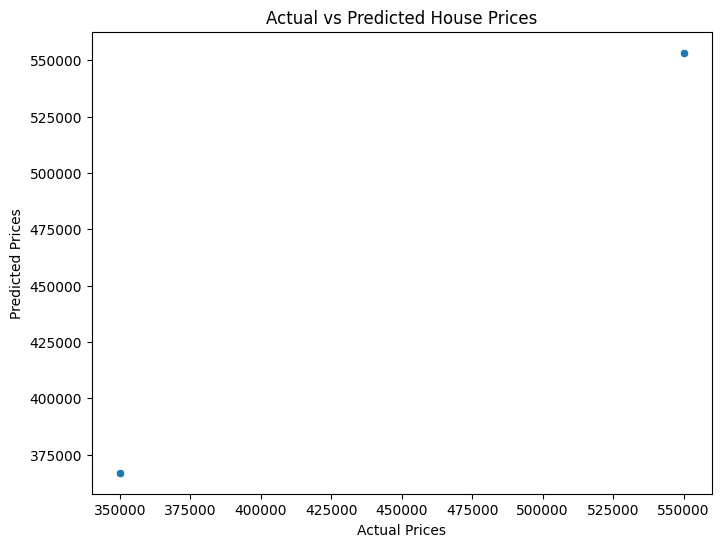

In [27]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=target_test, y=target_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [28]:
df

,SquareFeet,Bedrooms,Bathrooms,Location,Price
0,1500,3,2,1,300000
1,1800,4,2,2,350000
2,2400,4,3,2,450000
3,3000,5,3,3,600000
4,3500,5,4,3,650000
5,4000,6,5,3,700000
6,1200,2,1,1,250000
7,2500,4,3,2,500000
8,2700,4,3,3,550000
9,3200,5,4,3,620000


# Mentoring Recommendation model

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
# Simulated dataset of business KPIs
data = {
    'Profit': [50000, 120000, 30000, 70000, 200000, 10000, 90000, 40000, 5000, 150000],
    'BusinessValue': [200000, 500000, 100000, 300000, 900000, 50000, 400000, 150000, 30000, 800000],
    'GrantInvestment': [5000, 20000, 3000, 10000, 50000, 2000, 25000, 7000, 1000, 40000],
    'RecordsKeptUpdated': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0],  # 1 = Updated, 0 = Not Updated
    'BusinessMembersWorkingTogether': [4, 7, 3, 5, 8, 2, 6, 3, 1, 7]
}

df = pd.DataFrame(data)
print(df.head())


   Profit  BusinessValue  GrantInvestment  RecordsKeptUpdated  \
0   50000         200000             5000                   1   
1  120000         500000            20000                   0   
2   30000         100000             3000                   1   
3   70000         300000            10000                   1   
4  200000         900000            50000                   0   

   BusinessMembersWorkingTogether  
0                               4  
1                               7  
2                               3  
3                               5  
4                               8  


In [34]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [35]:
df_scaled

array([[-0.4386161 , -0.49065627, -0.69335593,  0.81649658, -0.26726124],
       [ 0.71999247,  0.53869255,  0.22702805, -1.22474487,  1.06904497],
       [-0.76964712, -0.83377254, -0.81607379,  0.81649658, -0.71269665],
       [-0.10758508, -0.14754   , -0.38656127,  0.81649658,  0.17817416],
       [ 2.04411654,  1.91115764,  2.067796  , -1.22474487,  1.51448037],
       [-1.10067814, -1.00533068, -0.87743272,  0.81649658, -1.15813205],
       [ 0.22344594,  0.19557628,  0.53382271,  0.81649658,  0.62360956],
       [-0.60413161, -0.66221441, -0.57063806, -1.22474487, -0.71269665],
       [-1.18343589, -1.07395393, -0.93879165,  0.81649658, -1.60356745],
       [ 1.21653899,  1.56804137,  1.45420668, -1.22474487,  1.06904497]])

In [36]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We assume 3 groups: Low, Medium, High
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(df[['Profit', 'BusinessValue', 'GrantInvestment', 'Cluster']])


   Profit  BusinessValue  GrantInvestment  Cluster
0   50000         200000             5000        2
1  120000         500000            20000        1
2   30000         100000             3000        2
3   70000         300000            10000        0
4  200000         900000            50000        1
5   10000          50000             2000        2
6   90000         400000            25000        0
7   40000         150000             7000        2
8    5000          30000             1000        2
9  150000         800000            40000        1


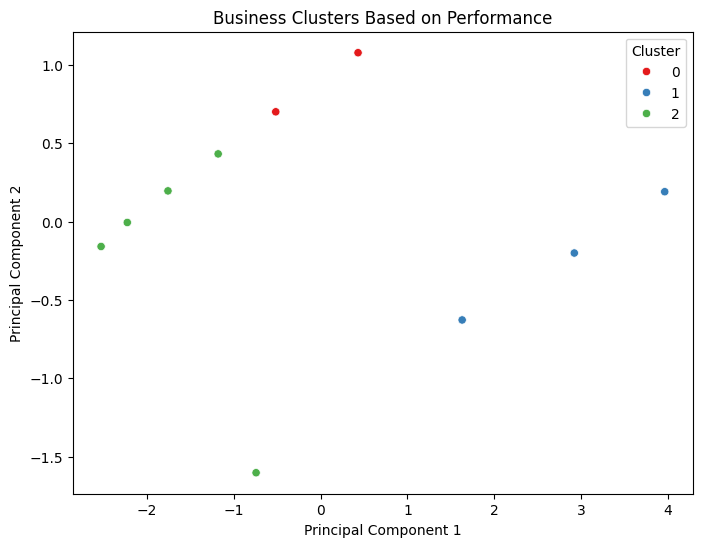

In [37]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='Set1')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Business Clusters Based on Performance")
plt.show()


In [38]:
# Group businesses by clusters
cluster_means = df.groupby('Cluster').mean()

# Define training needs for each cluster
training_suggestions = {
    0: "Basic financial management & record-keeping training",
    1: "Intermediate business growth strategies & investment management",
    2: "Advanced business expansion & leadership training"
}

df['TrainingNeed'] = df['Cluster'].map(training_suggestions)
print(df[['Cluster', 'TrainingNeed']])


   Cluster                                       TrainingNeed
0        2  Advanced business expansion & leadership training
1        1  Intermediate business growth strategies & inve...
2        2  Advanced business expansion & leadership training
3        0  Basic financial management & record-keeping tr...
4        1  Intermediate business growth strategies & inve...
5        2  Advanced business expansion & leadership training
6        0  Basic financial management & record-keeping tr...
7        2  Advanced business expansion & leadership training
8        2  Advanced business expansion & leadership training
9        1  Intermediate business growth strategies & inve...


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features and target variable
X = df.drop(columns=['Cluster', 'TrainingNeed'])
y = df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 50.00%


In [40]:
print(y_pred)

[2 0]


In [41]:
y_pred


array([2, 0], dtype=int32)

# Training a Custom AI Model for Business Training Suggestions

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample business KPI dataset with training labels
data = {
    'Profit': [50000, 120000, 30000, 70000, 200000, 10000, 90000, 40000, 5000, 150000],
    'BusinessValue': [200000, 500000, 100000, 300000, 900000, 50000, 400000, 150000, 30000, 800000],
    'GrantInvestment': [5000, 20000, 3000, 10000, 50000, 2000, 25000, 7000, 1000, 40000],
    'RecordsKeptUpdated': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0],  # 1 = Yes, 0 = No
    'BusinessMembersWorkingTogether': [4, 7, 3, 5, 8, 2, 6, 3, 1, 7],
    'TrainingNeed': [
        "Financial Management",
        "Business Expansion",
        "Record Keeping",
        "Investment Strategies",
        "Leadership Training",
        "Basic Business Skills",
        "Growth Planning",
        "Grant Utilization",
        "Business Fundamentals",
        "Advanced Leadership"
    ]
}

df = pd.DataFrame(data)
print(df.head())  # View data


2025-04-01 17:11:34.946865: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 17:11:34.948734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 17:11:34.964336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 17:11:34.978313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743516694.992119   13971 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743516694.99

   Profit  BusinessValue  GrantInvestment  RecordsKeptUpdated  \
0   50000         200000             5000                   1   
1  120000         500000            20000                   0   
2   30000         100000             3000                   1   
3   70000         300000            10000                   1   
4  200000         900000            50000                   0   

   BusinessMembersWorkingTogether           TrainingNeed  
0                               4   Financial Management  
1                               7     Business Expansion  
2                               3         Record Keeping  
3                               5  Investment Strategies  
4                               8    Leadership Training  


In [2]:
# Convert categorical labels into numeric values
encoder = LabelEncoder()
df['TrainingNeed'] = encoder.fit_transform(df['TrainingNeed'])

# Features & target variable
X = df.drop(columns=['TrainingNeed'])
y = df['TrainingNeed']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
# Define Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(len(df['TrainingNeed'].unique()), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=2)


Epoch 1/50


/home/ubuntu/Documents/web_dev/Coding_Practice/machinelearning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 17:12:40.826761: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1333 - loss: 2.5028 - val_accuracy: 0.5000 - val_loss: 1.8596
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4167 - loss: 2.5251 - val_accuracy: 0.5000 - val_loss: 1.8668
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4500 - loss: 2.3309 - val_accuracy: 0.5000 - val_loss: 1.8710
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2333 - loss: 2.3950 - val_accuracy: 0.5000 - val_loss: 1.8767
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1833 - loss: 2.4393 - val_accuracy: 0.5000 - val_loss: 1.8835
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2667 - loss: 2.4669 - val_accuracy: 0.5000 - val_loss: 1.8929
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4500 - loss: 2.3474 - val_accuracy: 0.5000 - val_loss: 1.9035
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 2.3200 - val_accuracy: 0.5000 - val_loss: 1.9129
Epoch 9/50


In [4]:
# Evaluate Model Performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert Predictions back to Text Labels
predicted_labels = encoder.inverse_transform(predicted_classes)
actual_labels = encoder.inverse_transform(y_test)

# Display Sample Results
comparison = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
print(comparison)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.0000e+00 - loss: 2.5624
Test Accuracy: 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
                  Actual              Predicted
0  Business Fundamentals  Basic Business Skills
1     Business Expansion    Advanced Leadership
